In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/himan/Downloads/Algerian Forest Fires Dataset cleaned.csv")

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [8]:
X=df.drop("FWI",axis=1)

In [9]:
y = df['FWI']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape,X_test.shape,y_train.shape

((182, 11), (61, 11), (182,))

<AxesSubplot:>

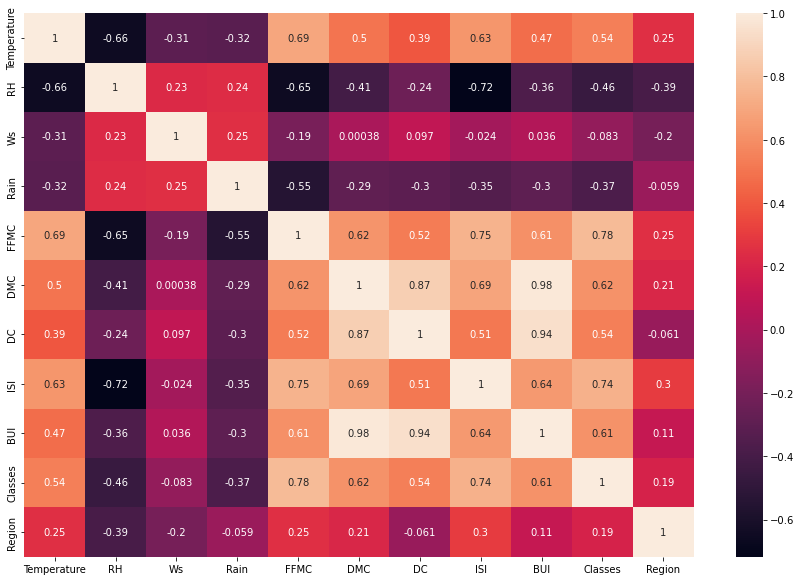

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [13]:
def Correlation(threshold,dataset):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
             if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col
                
            

In [14]:
corr_features = Correlation(0.84,X_train)

In [15]:
corr_features

{'BUI', 'DC'}

In [16]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [17]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [19]:
X_train_scaled.shape,X_test_scaled.shape


((182, 9), (61, 9))

In [20]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train after scalling')

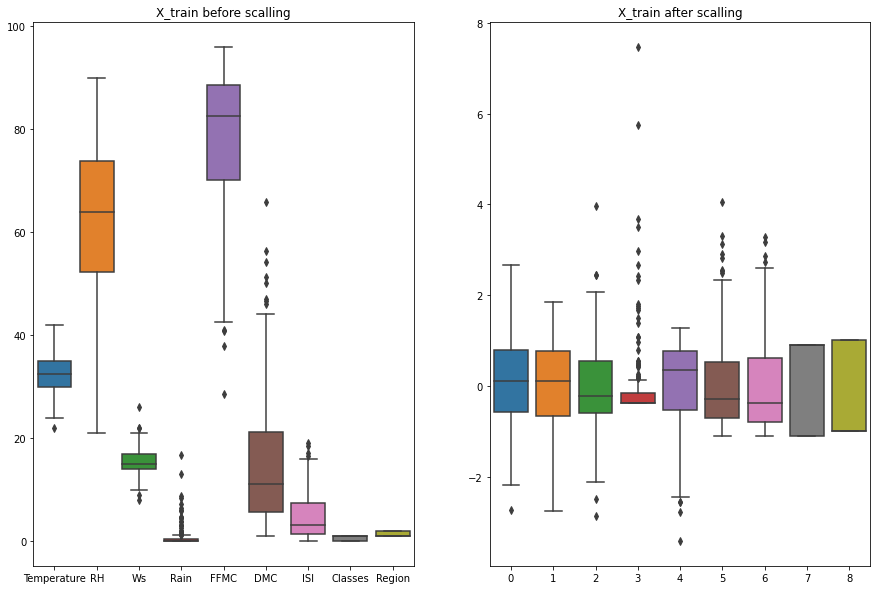

In [21]:
plt.subplots(figsize = (15,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scalling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scalling')

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred1 = lr.predict(X_test_scaled)
print(r2_score(y_pred1,y_test), mean_absolute_error(y_pred1,y_test) )              



0.9839977157632893 0.5468236465249987


# Lasso Rigression

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred2 = lasso.predict(X_test_scaled)
print(r2_score(y_pred2,y_test), mean_absolute_error(y_pred2,y_test) )              



0.9264742326805692 1.1331759949144085


# Ridge Rigression

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred3 = ridge.predict(X_test_scaled)
print(r2_score(y_pred3,y_test), mean_absolute_error(y_pred3,y_test) )              




0.9834070933284212 0.5642305340105693


# Elasticnet Regression

In [27]:
from sklearn.linear_model import ElasticNet
el = ElasticNet()
el.fit(X_train_scaled,y_train)
y_pred4 = el.predict(X_test_scaled)
print(r2_score(y_pred4,y_test), mean_absolute_error(y_pred4,y_test) )              




0.7814447243400926 1.8822353634896


In [28]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))